In [42]:
pip install kaggle

In [43]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [44]:
!kaggle competitions download -c cifar-10

cifar-10.zip: Skipping, found more recently modified local copy (use --force to force download)


In [45]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


In [46]:
from zipfile import ZipFile
file_name = "/content/cifar-10.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("THE DATA IS EXTRACTED")

THE DATA IS EXTRACTED


In [47]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


In [48]:
!pip install py7zr

In [49]:
from ast import arg
import py7zr

arg = py7zr.SevenZipFile("/content/train.7z", mode="r")
arg.extractall()
arg.close()


In [50]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


**IMPORTING THE DEPENDIES**

In [51]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [52]:
filenames= os.listdir("/content/train")
type(filenames)

list

In [53]:
len(filenames)

50000

In [54]:
print(filenames[0:5])
print(filenames[-5:])


['39682.png', '35836.png', '46137.png', '260.png', '8274.png']
['19838.png', '27284.png', '32807.png', '5726.png', '36319.png']


**LABELS PROCESSING**

In [55]:
labels_df = pd.read_csv("/content/trainLabels.csv")
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [56]:
labels_df.shape

(50000, 2)

In [57]:
labels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      50000 non-null  int64 
 1   label   50000 non-null  object
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


In [58]:
labels_df.describe()

,id
count,50000.000000
mean,25000.500000
std,14433.901067
min,1.000000
25%,12500.750000
50%,25000.500000
75%,37500.250000
max,50000.000000


In [59]:
labels_df[labels_df['id'] == 100]

,id,label
99,100,automobile


In [110]:
labels_df.head(10)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


In [63]:
#converting strings into integer
labels_dict = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}
labels=[labels_dict[i] for i in labels_df['label']]

In [64]:
labels_df

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
...,...,...
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile


In [65]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


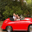

In [68]:
#displaying sample image
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread("/content/train/100.png")
cv2_imshow(img)

In [69]:
id_list = list(labels_df['id'])

In [70]:
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


**IMAGE PROCESSING**

In [71]:
#convert images to numpy arrays
train_data_folder='/content/train'

data= []
for i in id_list:
  img = Image.open(os.path.join(train_data_folder, str(i)+'.png'))
  img = np.array(img)
  data.append(img)

In [72]:
type(data)

list

In [73]:
len(data)

50000

In [74]:
type(data[0])

numpy.ndarray

In [75]:
data[0].shape

(32, 32, 3)

In [79]:
# convert images and labels to numpy arrays
x = np.array(data)
y = np.array(labels)

In [80]:
type(x)

numpy.ndarray

In [81]:
print(x.shape)
print(y.shape)

(50000, 32, 32, 3)
(50000,)


**TRAIN TEST SPLIT**

In [82]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [84]:
print(x.shape,x_train.shape,x_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [87]:
#scaling the data
x_train_scaled= x_train/255
x_test_scaled= x_test/255

In [88]:
x_train_scaled

array([[[[0.00052288, 0.00055363, 0.00066128],
         [0.00056901, 0.00056901, 0.00078431],
         [0.00067666, 0.00067666, 0.00098424],
         ...,
         [0.00095348, 0.00112265, 0.00143022],
         [0.00079969, 0.00096886, 0.00127643],
         [0.00069204, 0.00087659, 0.00118416]],

        [[0.00053825, 0.00053825, 0.00056901],
         [0.00052288, 0.00052288, 0.00061515],
         [0.00052288, 0.0005075 , 0.00066128],
         ...,
         [0.00089196, 0.00106113, 0.0013687 ],
         [0.00076894, 0.00092272, 0.0012303 ],
         [0.0007228 , 0.00089196, 0.00119954]],

        [[0.00052288, 0.0005075 , 0.00053825],
         [0.0005075 , 0.00049212, 0.00055363],
         [0.0005075 , 0.00049212, 0.00058439],
         ...,
         [0.00101499, 0.00118416, 0.00149173],
         [0.00078431, 0.00095348, 0.00126105],
         [0.00081507, 0.00098424, 0.00129181]],

        ...,

        [[0.00049212, 0.00049212, 0.00058439],
         [0.00049212, 0.00047674, 0.00056901]

In [89]:
x_train_scaled[0]

array([[[0.00052288, 0.00055363, 0.00066128],
        [0.00056901, 0.00056901, 0.00078431],
        [0.00067666, 0.00067666, 0.00098424],
        ...,
        [0.00095348, 0.00112265, 0.00143022],
        [0.00079969, 0.00096886, 0.00127643],
        [0.00069204, 0.00087659, 0.00118416]],

       [[0.00053825, 0.00053825, 0.00056901],
        [0.00052288, 0.00052288, 0.00061515],
        [0.00052288, 0.0005075 , 0.00066128],
        ...,
        [0.00089196, 0.00106113, 0.0013687 ],
        [0.00076894, 0.00092272, 0.0012303 ],
        [0.0007228 , 0.00089196, 0.00119954]],

       [[0.00052288, 0.0005075 , 0.00053825],
        [0.0005075 , 0.00049212, 0.00055363],
        [0.0005075 , 0.00049212, 0.00058439],
        ...,
        [0.00101499, 0.00118416, 0.00149173],
        [0.00078431, 0.00095348, 0.00126105],
        [0.00081507, 0.00098424, 0.00129181]],

       ...,

       [[0.00049212, 0.00049212, 0.00058439],
        [0.00049212, 0.00047674, 0.00056901],
        [0.0005075 , 0

**BUILDING THE NEURAL NETWORK**

In [90]:
import tensorflow as tf
from tensorflow import keras


In [92]:
num_of_classes =  10

#setting the neural of neural network

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_of_classes, activation='softmax')
])


In [93]:
#compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [94]:
#training the neurla network
model.fit(x_train_scaled, y_train,validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 6s 4ms/step - loss: 2.1351 - accuracy: 0.2352 - val_loss: 1.9912 - val_accuracy: 0.2928
Epoch 2/10
1125/1125 [==============================] - 4s 4ms/step - loss: 1.9500 - accuracy: 0.3071 - val_loss: 1.9087 - val_accuracy: 0.3257
Epoch 3/10
1125/1125 [==============================] - 5s 4ms/step - loss: 1.8886 - accuracy: 0.3329 - val_loss: 1.8667 - val_accuracy: 0.3440
Epoch 4/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.8523 - accuracy: 0.3434 - val_loss: 1.8356 - val_accuracy: 0.3627
Epoch 5/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.8240 - accuracy: 0.3538 - val_loss: 1.8127 - val_accuracy: 0.3602
Epoch 6/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7999 - accuracy: 0.3620 - val_loss: 1.7935 - val_accuracy: 0.3675
Epoch 7/10
1125/1125 [==============================] - 4s 4ms/step - loss: 1.7794 - accuracy: 0.3668 - val_loss: 1.7719 - val_accuracy:

**RestNET50**

In [98]:
from tensorflow.keras import Sequential,models,layers
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [99]:
convolutional_base = ResNet50(weights='imagenet',
                               include_top=False,
                               input_shape=(256,256,3))
convolutional_base.summary()

94765736/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                      

In [107]:
num_of_classes = 10

model =models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes,activation='relu'))

In [108]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [109]:
history = model.fit(x_train_scaled, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1125/1125 [==============================] - 481s 385ms/step - loss: 5.8152 - acc: 0.1011 - val_loss: 2.3026 - val_acc: 0.1002
Epoch 2/10
1125/1125 [==============================] - 437s 388ms/step - loss: 3.3860 - acc: 0.1013 - val_loss: 2.7443 - val_acc: 0.1312
Epoch 3/10
1125/1125 [==============================] - 429s 381ms/step - loss: 3.0909 - acc: 0.1008 - val_loss: 2.3315 - val_acc: 0.1028
Epoch 4/10
1125/1125 [==============================] - 423s 376ms/step - loss: 2.3504 - acc: 0.1002 - val_loss: 2.3211 - val_acc: 0.1032
Epoch 5/10
1125/1125 [==============================] - 413s 367ms/step - loss: 2.3038 - acc: 0.1003 - val_loss: 2.3057 - val_acc: 0.1032
Epoch 6/10
1125/1125 [==============================] - 421s 374ms/step - loss: 2.3044 - acc: 0.1004 - val_loss: 2.3057 - val_acc: 0.1030
Epoch 7/10
1125/1125 [==============================] - 413s 367ms/step - loss: 2.3029 - acc: 0.1004 - val_loss: 2.3026 - val_acc: 0.1032
Epoch 8/10
1125/1125 [============

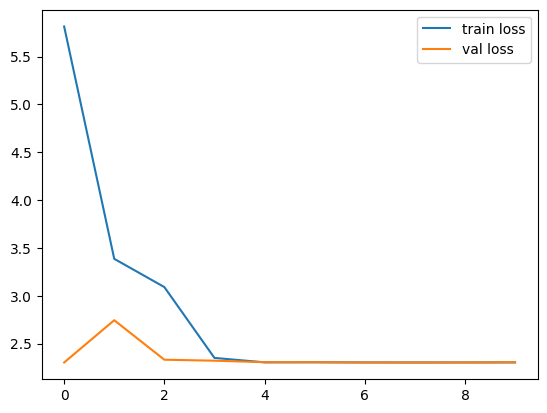

In [111]:
h=history

#ploting the loss function value
plt.plot(h.history['loss'],label='train loss')
plt.plot(h.history['val_loss'],label='val loss')
plt.legend()
plt.show()